In [11]:
!pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

sns.set(style="whitegrid")


   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
    --------------------------------------- 0.8/44.8 MB 8.5 MB/s eta 0:00:06
   - -------------------------------------- 1.8/44.8 MB 5.6 MB/s eta 0:00:08
   -- ------------------------------------- 3.1/44.8 MB 6.8 MB/s eta 0:00:07
   ---- ----------------------------------- 5.0/44.8 MB 7.0 MB/s eta 0:00:06
   ------ --------------------------------- 7.1/44.8 MB 7.5 MB/s eta 0:00:06
   ------- -------------------------------- 8.9/44.8 MB 7.7 MB/s eta 0:00:05
   --------- ------------------------------ 11.0/44.8 MB 8.0 MB/s eta 0:00:05
   ----------- ---------------------------- 12.6/44.8 MB 7.9 MB/s eta 0:00:05
   ------------ --------------------------- 14.4/44.8 MB 7.9 MB/s eta 0:00:04
   -------------- ------------------------- 16.0/44.8 MB 7.9 MB/s eta 0:00:04
   --------------- ------------------------ 17.3/44.8 MB 7.8 MB/s eta 0:00:04
   ----------------- ---------------------- 19.1/44.8 MB 7.9 MB/s eta 0:00:04


In [4]:
# Datos de Gr1
data_gr1 = {
    "Sexo": ["Mujer", "Hombre", "Mujer", "Mujer", "Mujer", "Hombre", "Mujer", "Hombre", "Hombre", "Mujer", 
             "Mujer", "Hombre", "Hombre", "Mujer", "Mujer", "Hombre", "Mujer", "Mujer", "Mujer", "Mujer"],
    "Edad": [25, 30, 28, 20, 23, 22, 22, 22, 21, 21, 22, 20, 22, 29, 29, 21, 30, 21, 22, 23],
    "Estatura": [1.82, 1.83, 1.78, 1.79, 1.80, 1.90, 1.79, 1.83, np.nan, 1.65, 
                 1.73, 1.79, 1.80, 1.77, 1.69, 1.75, 1.66, np.nan, 1.79, 1.80],
    "Grupo_Sanguíneo": ["A", "B", "A", "AB", "0", "A", "B", "A", "B", "AB", 
                        "A", "B", "0", "0", "A", "B", "AB", "B", "B", "B"]
}

# Datos de Gr2
data_gr2 = {
    "Sexo": ["Mujer", "Hombre", "Hombre", "Mujer", "Hombre", "Hombre", "Mujer", "Hombre", "Hombre", "Mujer", 
             "Mujer", "Hombre", "Hombre", "Mujer", "Hombre", "Hombre", "Mujer", "Hombre", "Hombre", "Mujer"],
    "Edad": [25, 30, 38, 26, 23, 22, 32, 26, 25, 28, 
             22, 30, 22, 39, 29, 25, 30, 23, 32, 33],
    "Estatura": [1.72, 1.73, 1.78, 1.79, np.nan, 1.90, 1.79, 1.83, np.nan, 1.75, 
                 1.79, 1.79, 1.85, np.nan, 1.79, 1.75, 1.66, np.nan, 1.79, 1.83],
    "Grupo_Sanguíneo": ["B", "B", "A", "AB", "0", "AB", "B", "B", "B", "AB", 
                        "A", "B", "0", "0", "B", "B", "A", "0", "B", "B"]
}

gr1 = pd.DataFrame(data_gr1)
gr2 = pd.DataFrame(data_gr2)

# Mostrar los DataFrames
import IPython.display as display

# Visualizar Gr1
print("Datos de Gr1:")
display.display(gr1)

# Visualizar Gr2
print("Datos de Gr2:")
display.display(gr2)


Datos de Gr1:


,Sexo,Edad,Estatura,Grupo_Sanguíneo
0,Mujer,25,1.82,A
1,Hombre,30,1.83,B
2,Mujer,28,1.78,A
3,Mujer,20,1.79,AB
4,Mujer,23,1.80,0
5,Hombre,22,1.90,A
6,Mujer,22,1.79,B
7,Hombre,22,1.83,A
8,Hombre,21,NaN,B
9,Mujer,21,1.65,AB


Datos de Gr2:


,Sexo,Edad,Estatura,Grupo_Sanguíneo
0,Mujer,25,1.72,B
1,Hombre,30,1.73,B
2,Hombre,38,1.78,A
3,Mujer,26,1.79,AB
4,Hombre,23,NaN,0
5,Hombre,22,1.90,AB
6,Mujer,32,1.79,B
7,Hombre,26,1.83,B
8,Hombre,25,NaN,B
9,Mujer,28,1.75,AB


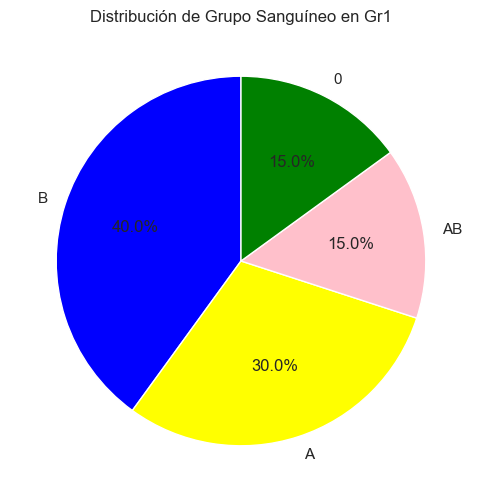

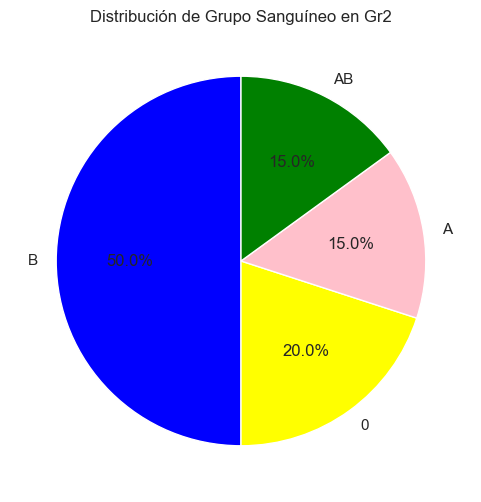

In [5]:
#1. Representar la variable Grupo Sanguíneo mediante un diagrama de sectores en
#cada uno de los grupos. Incluir un título descriptivo en cada gráfico y colorear los
#sectores de azul, amarillo, rosa y verde.

def pie_chart(data, title):
    plt.figure(figsize=(6, 6))
    data['Grupo_Sanguíneo'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow', 'pink', 'green'])
    plt.title(title)
    plt.ylabel('')
    plt.show()

# Gráficos de Gr1 y Gr2
pie_chart(gr1, 'Distribución de Grupo Sanguíneo en Gr1')
pie_chart(gr2, 'Distribución de Grupo Sanguíneo en Gr2')


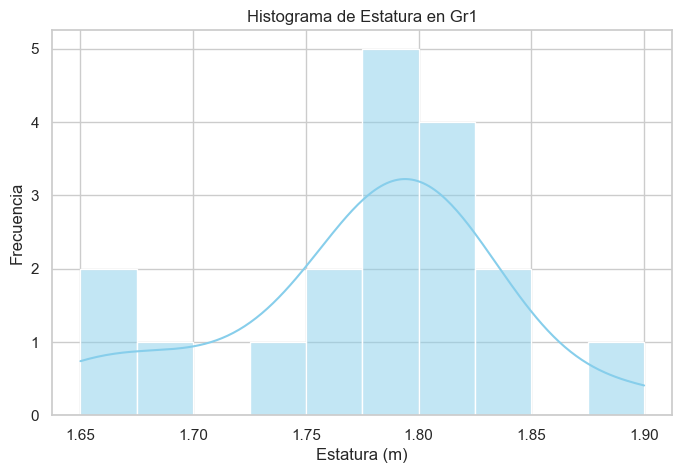

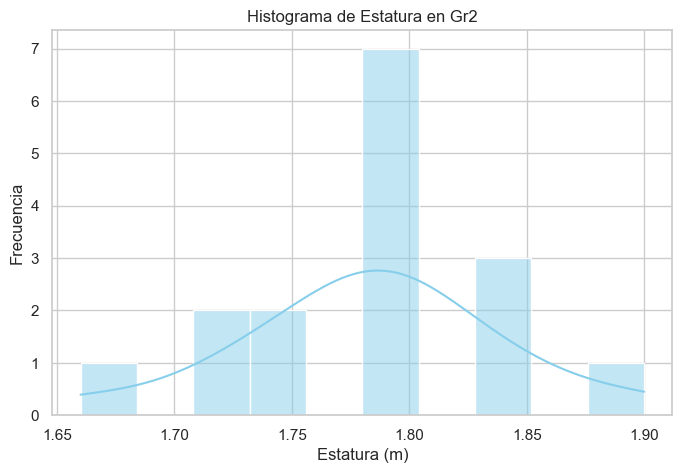

In [6]:
#2. Representar la variable Estatura mediante un histograma en cada uno de los
#grupos.

def histogram(data, title):
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Estatura'].dropna(), bins=10, kde=True, color='skyblue')
    plt.title(title)
    plt.xlabel('Estatura (m)')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Histogramas de Gr1 y Gr2
histogram(gr1, 'Histograma de Estatura en Gr1')
histogram(gr2, 'Histograma de Estatura en Gr2')


In [7]:
#3. ¿Existe algún dato atípico en la variable Edad en el grupo A? ¿Y en el grupo B?

def detect_outliers(data):
    Q1 = data['Edad'].quantile(0.25)
    Q3 = data['Edad'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['Edad'] < lower_bound) | (data['Edad'] > upper_bound)]
    return outliers

outliers_gr1 = detect_outliers(gr1)
outliers_gr2 = detect_outliers(gr2)

print("Datos atípicos en la variable Edad en Gr1:")
print(outliers_gr1)

print("\nDatos atípicos en la variable Edad en Gr2:")
print(outliers_gr2)


Datos atípicos en la variable Edad en Gr1:
Empty DataFrame
Columns: [Sexo, Edad, Estatura, Grupo_Sanguíneo]
Index: []

Datos atípicos en la variable Edad en Gr2:
Empty DataFrame
Columns: [Sexo, Edad, Estatura, Grupo_Sanguíneo]
Index: []


In [13]:
#4. ¿Cuál es el valor máximo del 40% de las estaturas más pequeñas de los individuos
#en el grupo A? ¿Y el valor mínimo del 30% de las estaturas mayores de los
#individuos en el grupo B?

def statistical_analysis(data):
    mean_height = data['Estatura'].mean()
    median_height = data['Estatura'].median()
    return mean_height, median_height

mean_height_gr1, median_height_gr1 = statistical_analysis(gr1)
mean_height_gr2, median_height_gr2 = statistical_analysis(gr2)

print(f"Altura media en Gr1: {mean_height_gr1:.2f} m")
print(f"Altura media en Gr2: {mean_height_gr2:.2f} m")
print(f"Altura mediana en Gr1: {median_height_gr1:.2f} m")
print(f"Altura mediana en Gr2: {median_height_gr2:.2f} m")


Altura media en Gr1: 1.78 m
Altura media en Gr2: 1.78 m
Altura mediana en Gr1: 1.79 m
Altura mediana en Gr2: 1.79 m


In [14]:
#5. ¿Dónde son las variables edad y estatura más homogéneas: en el grupo A o en el B?
# Desviación estándar de la edad y estatura para los grupos A y B
homogeneidad_edad_a = gr1[gr1['Grupo_Sanguíneo'] == 'A']['Edad'].std()
homogeneidad_edad_b = gr1[gr1['Grupo_Sanguíneo'] == 'B']['Edad'].std()

homogeneidad_estatura_a = gr1[gr1['Grupo_Sanguíneo'] == 'A']['Estatura'].std()
homogeneidad_estatura_b = gr1[gr1['Grupo_Sanguíneo'] == 'B']['Estatura'].std()

print(f"Desviación estándar de Edad en grupo A: {homogeneidad_edad_a:.2f}")
print(f"Desviación estándar de Edad en grupo B: {homogeneidad_edad_b:.2f}")
print(f"Desviación estándar de Estatura en grupo A: {homogeneidad_estatura_a:.2f}")
print(f"Desviación estándar de Estatura en grupo B: {homogeneidad_estatura_b:.2f}")

# Comparar
if homogeneidad_edad_a < homogeneidad_edad_b:
    print("La variable Edad es más homogénea en el grupo A.")
else:
    print("La variable Edad es más homogénea en el grupo B.")

if homogeneidad_estatura_a < homogeneidad_estatura_b:
    print("La variable Estatura es más homogénea en el grupo A.")
else:
    print("La variable Estatura es más homogénea en el grupo B.")


Desviación estándar de Edad en grupo A: 3.20
Desviación estándar de Edad en grupo B: 3.16
Desviación estándar de Estatura en grupo A: 0.08
Desviación estándar de Estatura en grupo B: 0.03
La variable Edad es más homogénea en el grupo B.
La variable Estatura es más homogénea en el grupo B.


In [15]:
#6. ¿En qué grupo presentan los individuos una altura media mayor? ¿En qué grupo
#presentan los individuos una altura mediana menor?

# Altura media y mediana para los grupos A y B
media_estatura_a = gr1[gr1['Grupo_Sanguíneo'] == 'A']['Estatura'].mean()
media_estatura_b = gr1[gr1['Grupo_Sanguíneo'] == 'B']['Estatura'].mean()

mediana_estatura_a = gr1[gr1['Grupo_Sanguíneo'] == 'A']['Estatura'].median()
mediana_estatura_b = gr1[gr1['Grupo_Sanguíneo'] == 'B']['Estatura'].median()

print(f"Altura media en grupo A: {media_estatura_a:.2f}")
print(f"Altura media en grupo B: {media_estatura_b:.2f}")
print(f"Altura mediana en grupo A: {mediana_estatura_a:.2f}")
print(f"Altura mediana en grupo B: {mediana_estatura_b:.2f}")

# Comparar alturas
if media_estatura_a > media_estatura_b:
    print("La altura media es mayor en el grupo A.")
else:
    print("La altura media es mayor en el grupo B.")

if mediana_estatura_a < mediana_estatura_b:
    print("La altura mediana es menor en el grupo A.")
else:
    print("La altura mediana es menor en el grupo B.")


Altura media en grupo A: 1.79
Altura media en grupo B: 1.79
Altura mediana en grupo A: 1.80
Altura mediana en grupo B: 1.79
La altura media es mayor en el grupo B.
La altura mediana es menor en el grupo B.


In [16]:
#7. Estudia la asimetría y la curtosis de la variable Estatura en el grupo A.
    
skewness = skew(gr1[gr1['Grupo_Sanguíneo'] == 'A']['Estatura'].dropna())
kurt = kurtosis(gr1[gr1['Grupo_Sanguíneo'] == 'A']['Estatura'].dropna())

print(f"Asimetría de la variable Estatura en el grupo A: {skewness:.2f}")
print(f"Curtosis de la variable Estatura en el grupo A: {kurt:.2f}")


Asimetría de la variable Estatura en el grupo A: 0.03
Curtosis de la variable Estatura en el grupo A: -1.04
